# ATP Tennis Data - Player Diff Stats + One Hot Encoding (All Categorical Data)


In our previous [notebook](https://github.com/sv650s/sb-capstone2/blob/master/notebooks/5.1-atp_diff-ohe_player.ipynb), we saw that Decision Tree is still the best algorithm when we used the data set where we used player diff stats but we one hot encoded player id

In this notebook, we will run the same algorithms but we will one hot encode all categorical data - ie, tournament id, surface

### Results from Decision Tree Classifier with player diff dataset:

```
Model Score: 0.924307900067522

              precision    recall  f1-score   support

        Loss       0.92      0.93      0.92      7416
         Win       0.93      0.92      0.92      7394

    accuracy                           0.92     14810
   macro avg       0.92      0.92      0.92     14810
weighted avg       0.92      0.92      0.92     14810
```

# Summary of Results


Decision Tree is still our best model at around .5 percent to 93% accuracy. Although difference not sure if it's statistically significant yet without further analysis


```
Model Score: 0.925793382849426

              precision    recall  f1-score   support

        Loss       0.92      0.93      0.93      7453
         Win       0.93      0.92      0.92      7357

    accuracy                           0.93     14810
   macro avg       0.93      0.93      0.93     14810
weighted avg       0.93      0.93      0.93     14810
```


* No improvements for Adaboost
* Logistic Regression, Grandient Boosting and Random Forest did worse with OHE categorical features
* Significant improvement for KNN



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.decomposition import PCA
from datetime import datetime
import pickle
import json
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from util import jupyter_util as ju
from util.model_util import ModelWrapper, REPORT_FILE, RSTATE, N_JOBS, MAX_ITER, LABEL_COL

%matplotlib inline
sns.set()


# date
DATE_FORMAT = '%Y-%m-%d'
DATE = datetime.now().strftime(DATE_FORMAT)

DESCRIPTION = "diff-ohe"


# update this
FEATURE_FILE = f'../datasets/atp_matches_1985-2019_features-{DESCRIPTION}.csv'

START_YEAR = 1998
END_YEAR = 2018




In [2]:
X_train, X_test, y_train, y_test = ju.get_data(FEATURE_FILE, LABEL_COL, START_YEAR, END_YEAR)

# Logistic Regression

In [3]:

# train our model

lr = ModelWrapper(LogisticRegression(n_jobs = N_JOBS, verbose = 1, random_state = RSTATE),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_lr = lr.predict()

//anaconda3/envs/capstone2/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/envs/capstone2/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[LibLinear]

Model Score: 0.6724510465901418

ROC/AUC Score: 0.6725138811528457
              precision    recall  f1-score   support

        Loss       0.68      0.66      0.67      7453
         Win       0.67      0.68      0.67      7357

    accuracy                           0.67     14810
   macro avg       0.67      0.67      0.67     14810
weighted avg       0.67      0.67      0.67     14810

      Loss   Win
Loss  4940  2513
Win   2338  5019


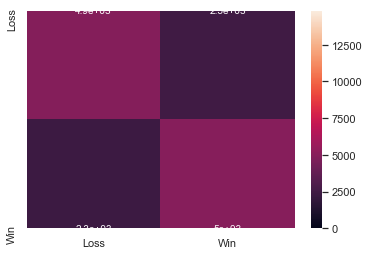

In [4]:
lr.analyze()

In [5]:
# ju.plot_2d(X_test, y_predict_lr)

In [6]:
lr.save()

Saving report: ../reports/summary.csv


# KNN

In [7]:

# train our model

knn = ModelWrapper(KNeighborsClassifier(n_jobs = N_JOBS),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_knn = knn.predict()

Model Score: 0.8399054692775152

ROC/AUC Score: 0.8398308982495735
              precision    recall  f1-score   support

        Loss       0.83      0.85      0.84      7453
         Win       0.85      0.83      0.84      7357

    accuracy                           0.84     14810
   macro avg       0.84      0.84      0.84     14810
weighted avg       0.84      0.84      0.84     14810

      Loss   Win
Loss  6345  1108
Win   1263  6094


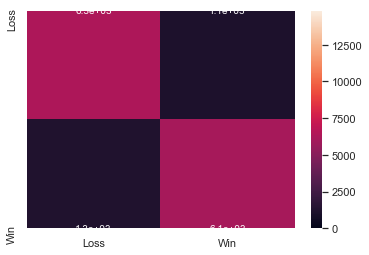

In [8]:
knn.analyze()

In [9]:
# ju.plot_2d(X_test, y_predict_knn)

In [10]:
knn.save()

Saving report: ../reports/summary.csv


# Decision Tree

In [11]:

# train our model

dt = ModelWrapper(DecisionTreeClassifier(random_state = RSTATE),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_dt = dt.predict()

Model Score: 0.925793382849426

ROC/AUC Score: 0.9257583124191925
              precision    recall  f1-score   support

        Loss       0.92      0.93      0.93      7453
         Win       0.93      0.92      0.92      7357

    accuracy                           0.93     14810
   macro avg       0.93      0.93      0.93     14810
weighted avg       0.93      0.93      0.93     14810

      Loss   Win
Loss  6940   513
Win    586  6771


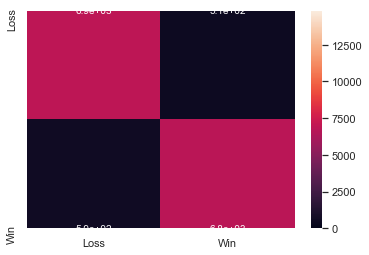

In [12]:
dt.analyze()

In [13]:
# ju.plot_2d(X_test, y_predict_dt)

In [14]:
dt.save()

Saving report: ../reports/summary.csv


# Random Forest Classifier

In [15]:

# train our model

rf = ModelWrapper(RandomForestClassifier(random_state=RSTATE, verbose=1),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_rf = rf.predict()

//anaconda3/envs/capstone2/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    8.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


Model Score: 0.8039837947332883

ROC/AUC Score: 0.8037527674901905
              precision    recall  f1-score   support

        Loss       0.79      0.84      0.81      7453
         Win       0.83      0.77      0.80      7357

    accuracy                           0.80     14810
   macro avg       0.81      0.80      0.80     14810
weighted avg       0.81      0.80      0.80     14810

      Loss   Win
Loss  6256  1197
Win   1706  5651


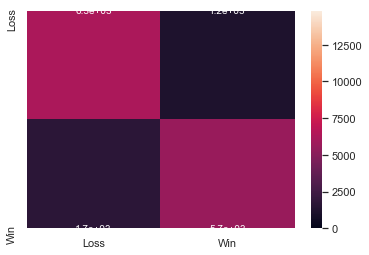

In [16]:
rf.analyze()

In [17]:
# ju.plot_2d(X_test, y_predict_rf)

In [18]:
rf.save()

Saving report: ../reports/summary.csv


# Gradient Boosting

In [19]:

# train our model

gb = ModelWrapper(GradientBoostingClassifier(random_state=RSTATE, verbose=1, n_iter_no_change = 4),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_gb = gb.predict()

      Iter       Train Loss   Remaining Time 
         1           1.3157           10.71m
         2           1.2579           10.37m
         3           1.2102           10.21m
         4           1.1722           10.09m
         5           1.1405            9.97m
         6           1.1058            9.92m
         7           1.0785            9.76m
         8           1.0558            9.64m
         9           1.0321            9.55m
        10           1.0159            9.43m
        20           0.8899            8.36m
        30           0.8228            7.29m
        40           0.7862            6.24m
        50           0.7597            5.19m
        60           0.7419            4.15m
        70           0.7280            3.11m
        80           0.7033            2.08m
        90           0.6871            1.04m
       100           0.6785            0.00s


Model Score: 0.8552329507089804

ROC/AUC Score: 0.855071920868579
              precision    recall  f1-score   support

        Loss       0.84      0.88      0.86      7453
         Win       0.87      0.83      0.85      7357

    accuracy                           0.86     14810
   macro avg       0.86      0.86      0.86     14810
weighted avg       0.86      0.86      0.86     14810

      Loss   Win
Loss  6558   895
Win   1249  6108


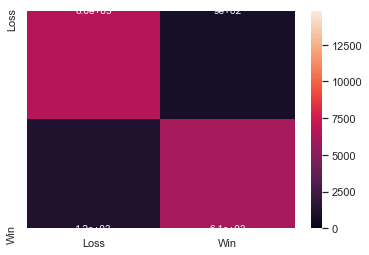

In [20]:
gb.analyze()

In [21]:
# ju.plot_2d(X_test, y_predict_gb)

In [22]:
gb.save()

Saving report: ../reports/summary.csv


# AdaBoost

In [23]:
ab = ModelWrapper(AdaBoostClassifier(random_state=RSTATE),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_ab = ab.predict()

Model Score: 0.7492910195813639

ROC/AUC Score: 0.7490611957994169
              precision    recall  f1-score   support

        Loss       0.74      0.78      0.76      7453
         Win       0.77      0.71      0.74      7357

    accuracy                           0.75     14810
   macro avg       0.75      0.75      0.75     14810
weighted avg       0.75      0.75      0.75     14810

      Loss   Win
Loss  5847  1606
Win   2107  5250


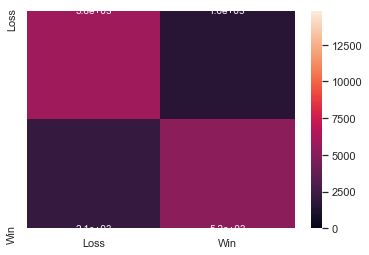

In [24]:
ab.analyze()

In [25]:
# ju.plot_2d(X_test, y_predict_ab)

In [26]:
ab.save()

Saving report: ../reports/summary.csv


# Results

* Decision Tree is still our best model
* no significant improvement for Adaboost
* We did see significant improvement for KNN when we used this dataset
* Gradient Boosting, Logistic Regression, Random Forest all did worse with this dataset

In [31]:
report = pd.read_csv(REPORT_FILE)
report.tail(5)

,model_name,description,data_file,start_year,end_year,accuracy,roc_auc_score,confusion_matrix,classification_report,model_file,predict_time_min,fit_time_min,total_time_min
98,DecisionTreeClassifier,diff-ohe-1985,../datasets/atp_matches_1985-2019_features-dif...,1985,2018,0.940423,0.940401,"{""0"": {""0"": 11860, ""1"": 812}, ""1"": {""0"": 676, ...","{""Loss"": {""precision"": 0.9359217171717171, ""re...",../models/decisiontreeclassifier-1985-2018-dif...,0.0,0.0,0.0
99,RandomForestClassifier,diff-ohe-1985,../datasets/atp_matches_1985-2019_features-dif...,1985,2018,0.798687,0.798538,"{""0"": {""0"": 10495, ""1"": 2987}, ""1"": {""0"": 2041...","{""Loss"": {""precision"": 0.7784453345201009, ""re...",../models/randomforestclassifier-1985-2018-dif...,0.0,0.0,0.0
100,GradientBoostingClassifier,diff-ohe-1985,../datasets/atp_matches_1985-2019_features-dif...,1985,2018,0.857143,0.857034,"{""0"": {""0"": 11100, ""1"": 2132}, ""1"": {""0"": 1436...","{""Loss"": {""precision"": 0.8388754534461911, ""re...",../models/gradientboostingclassifier-1985-2018...,0.0,24.0,24.0
101,AdaBoostClassifier,diff-ohe-1985,../datasets/atp_matches_1985-2019_features-dif...,1985,2018,0.752322,0.752196,"{""0"": {""0"": 9842, ""1"": 3492}, ""1"": {""0"": 2694,...","{""Loss"": {""precision"": 0.7381130943452827, ""re...",../models/adaboostclassifier-1985-2018-diff-oh...,0.0,2.0,2.0
102,DecisionTreeClassifier,diff-ohe-matchup_diff-1985-gridsearchCV,../datasets/atp_matches_1985-2019_features-dif...,1998,2018,0.935381,0.935324,"{""0"": {""0"": 7037, ""1"": 541}, ""1"": {""0"": 416, ""...","{""Loss"": {""precision"": 0.9286091316970176, ""re...",../models/decisiontreeclassifier-1998-2018-dif...,0.0,0.0,0.0


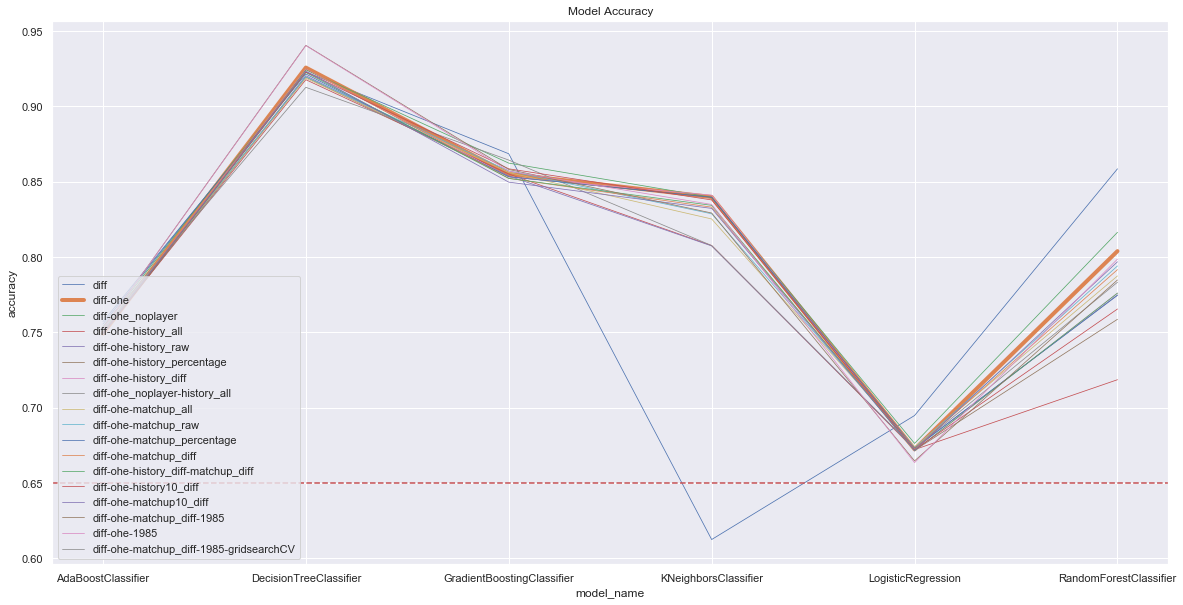

In [32]:
f, a = plt.subplots(1, 1, figsize=(20, 10))

descs = report.description.unique()

for desc in descs:
    report_desc = report[report.description == desc]
    if desc == DESCRIPTION:
        sns.lineplot(x="model_name", y="accuracy", data=report_desc, label=desc, linewidth=4)
    else:
        sns.lineplot(x="model_name", y="accuracy", data=report_desc, label=desc, linewidth=0.75)

a.axhline(0.65, ls='--', color='r')
a.set_title(f"Model Accuracy")
_ = a.legend(loc="lower left")

In [33]:
current_report = report[(report.model_name == 'DecisionTreeClassifier') &
                                  (report.description == DESCRIPTION)]
mw = ModelWrapper.get_model_wrapper_from_report(current_report)


In [34]:
import shap

shap.initjs()

explainer = shap.TreeExplainer(mw.model, data=X_train.values)
shap_values = explainer.shap_values(X_test.values)

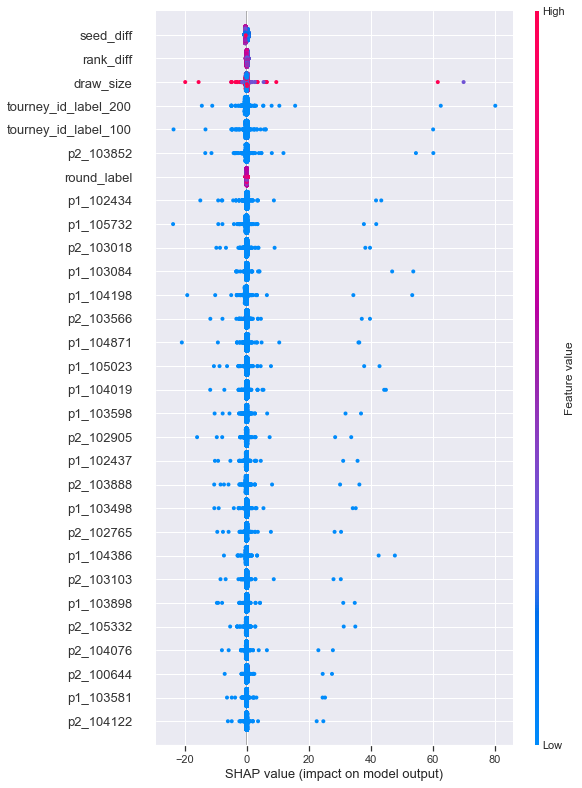

In [35]:
shap.summary_plot(shap_values[1], X_test, max_display=30)